In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
sys.path.append(base_path)

import deepdoctection as dd
from meri.layout.pipeline import Pipeline
from meri.layout.pipeline_components.utils import ProcessingService
from meri.configs import LAYOUT_CONFIGS_PATH

from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

/root/miniconda3/envs/layout_analysis/lib/python3.12/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[0828 09:06.04 @file_utils.py:36]  INF  PyTorch version 2.3.0 available.


In [2]:
pdf_path = f'{base_path}/data/demo_data/Alfa Laval LKH.pdf'

### Build pipeline

In [3]:
pipeline_config_path = os.path.abspath(os.path.join(LAYOUT_CONFIGS_PATH, 'custom.yaml'))
print(pipeline_config_path)
pipeline = Pipeline.from_config(cfg_path=pipeline_config_path)
pipeline.build()

[0828 09:06.06 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/layout/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


/workspaces/meri/meri/configs/layout/custom.yaml
abs_cfg_path  /workspaces/meri/meri/configs/layout/layout_detector_config.yaml
Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': ['table', 'figure'],
                   'WEIGHTS': 'layout/d2_model_0829999_layout_inf_only.pt'}}}>


[0828 09:06.08 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0828 09:06.09 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
You are using a model of type table-transformer to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
[0828 09:06.09 @_builder.py:187]  INF  Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)


abs_cfg_path  /workspaces/meri/meri/configs/layout/table_detector_config.yaml
Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': None,
                   'WEIGHTS': 'microsoft/table-transformer-detection/pytorch_model.bin'}}}>


[0828 09:06.09 @_hub.py:180]  INF  [timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
[0828 09:06.09 @_builder.py:245]  INF  Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
Some weights of the model checkpoint at /root/.cache/deepdoctection/weights/microsoft/table-transformer-detection/pytorch_model.bin were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a Ber

abs_cfg_path  /workspaces/meri/meri/configs/layout/layout_detector_config.yaml
Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': ['table', 'title', 'list', 'text'],
                   'WEIGHTS': 'layout/d2_model_0829999_layout_inf_only.pt'}}}>


[0828 09:06.10 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0828 09:06.10 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...


abs_cfg_path  /workspaces/meri/meri/configs/layout/nms.yaml
abs_cfg_path  /workspaces/meri/meri/configs/layout/tesseract_config.yaml
Building pipeline from components:  [<meri.layout.pipeline_components.add_pdf_info_component.AddPDFInfoComponent object at 0x7fd1865a5a60>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7fd193c06570>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7fd1877e0ce0>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7fd1867b87a0>, <meri.layout.pipeline_components.nms_component.NMSComponent object at 0x7fd187f85610>, <meri.layout.pipeline_components.ocr_component.OCRComponent object at 0x7fd188e95a30>, <meri.layout.pipeline_components.word_union_component.WordUnionComponent object at 0x7fd1862a00b0>]


### Run pipeline

In [4]:
dps, page_dicts = pipeline.run(pdf_path)

[0828 09:06.10 @doctectionpipe.py:84]  INF  Processing Alfa Laval LKH_0.pdf
[0828 09:06.11 @context.py:126]  INF  AddPDFInfoComponent total: 0.2379 sec.
/root/miniconda3/envs/layout_analysis/lib/python3.12/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1712608847532/work/aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[0828 09:06.14 @context.py:126]  INF  LayoutDetectorComponent total: 2.7662 sec.
[0828 09:06.14 @context.py:126]  INF  LayoutDetectorComponent total: 0.1887 sec.
[0828 09:06.15 @context.py:126]  INF  LayoutDetectorComponent total: 0.1552 sec.
[0828 09:06.15 @context.py:126]  INF  NMSComponent total: 0.0016 sec.
[0828 09:06.16 @context.py:126]  INF  OCRComponent total: 1.8782 sec.
[0828 09:06.16 @context.py:126]  INF  WordUnionComponent total: 0.0001 sec.
[082

### Visualize layout

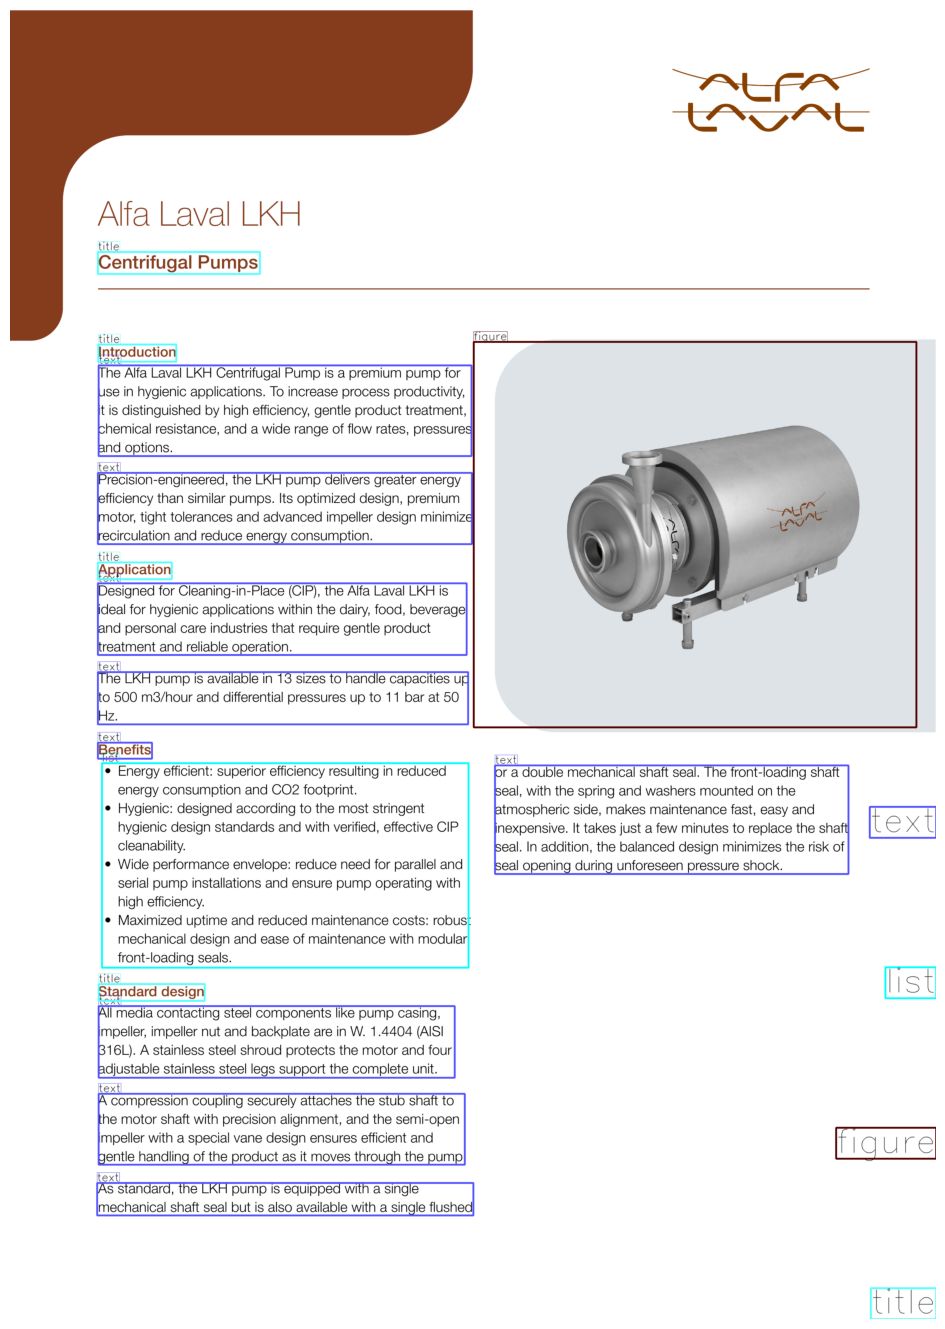

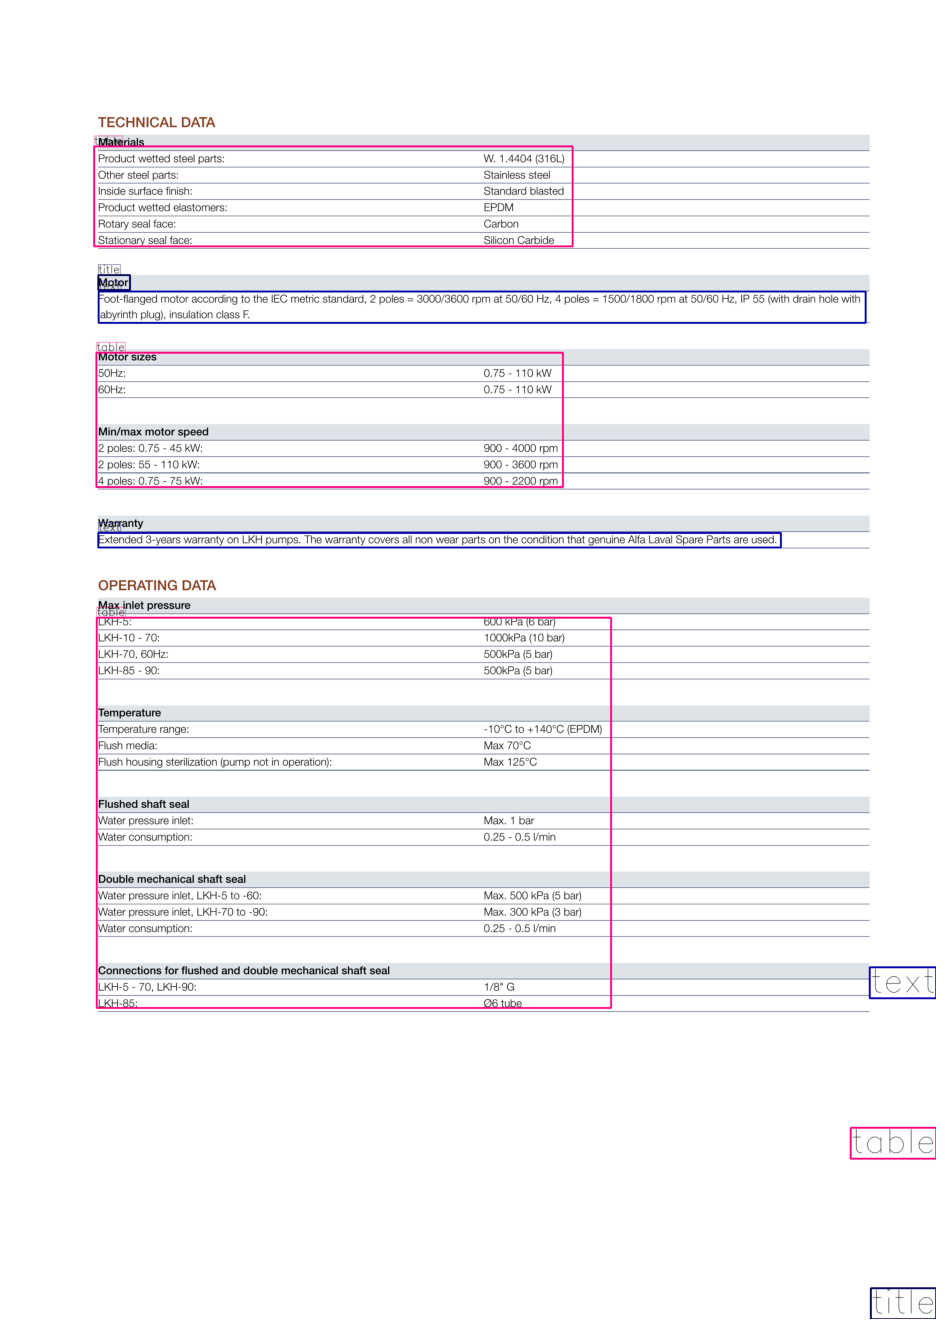

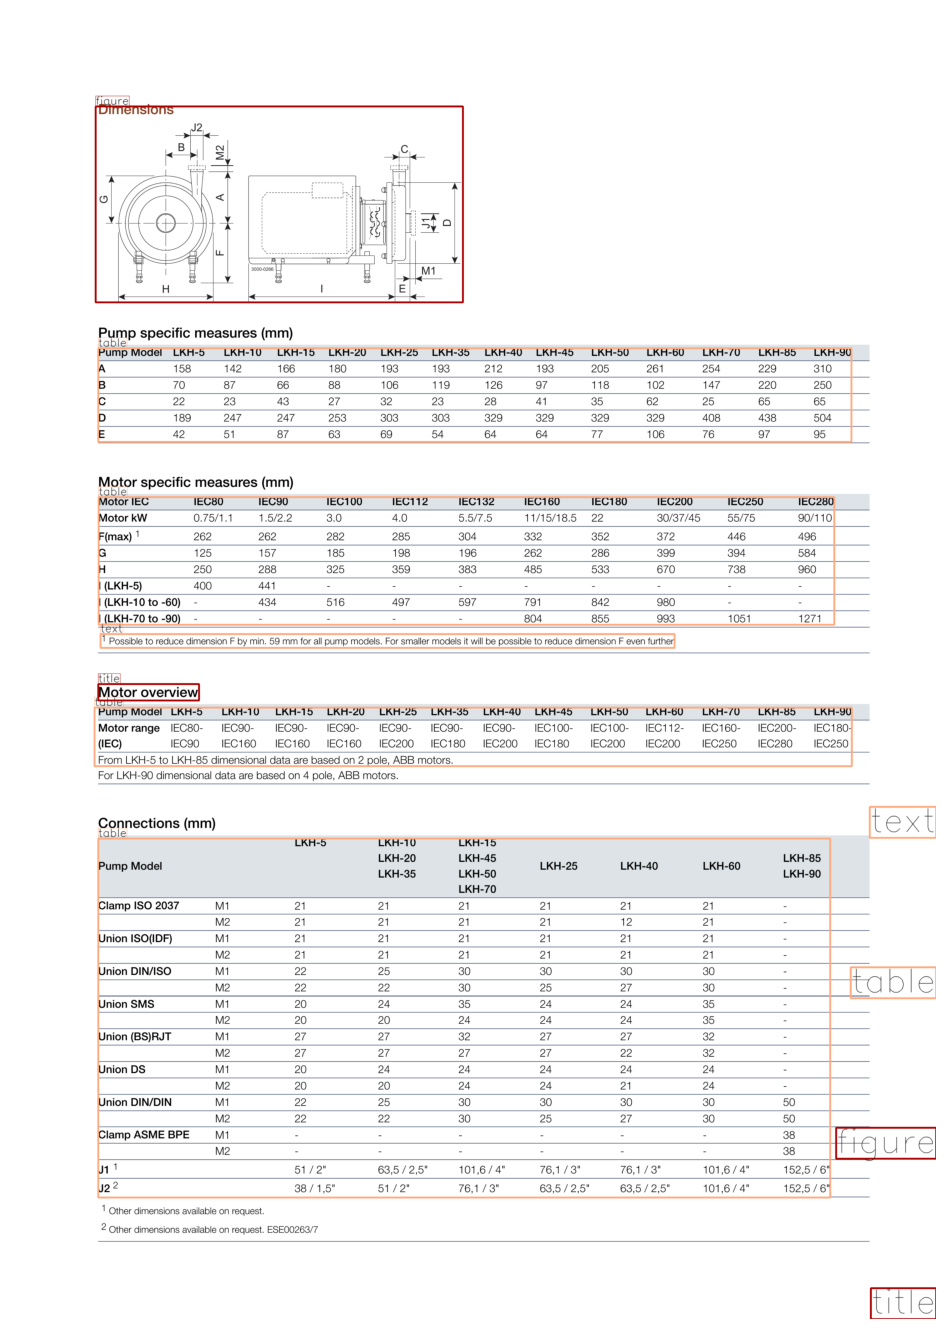

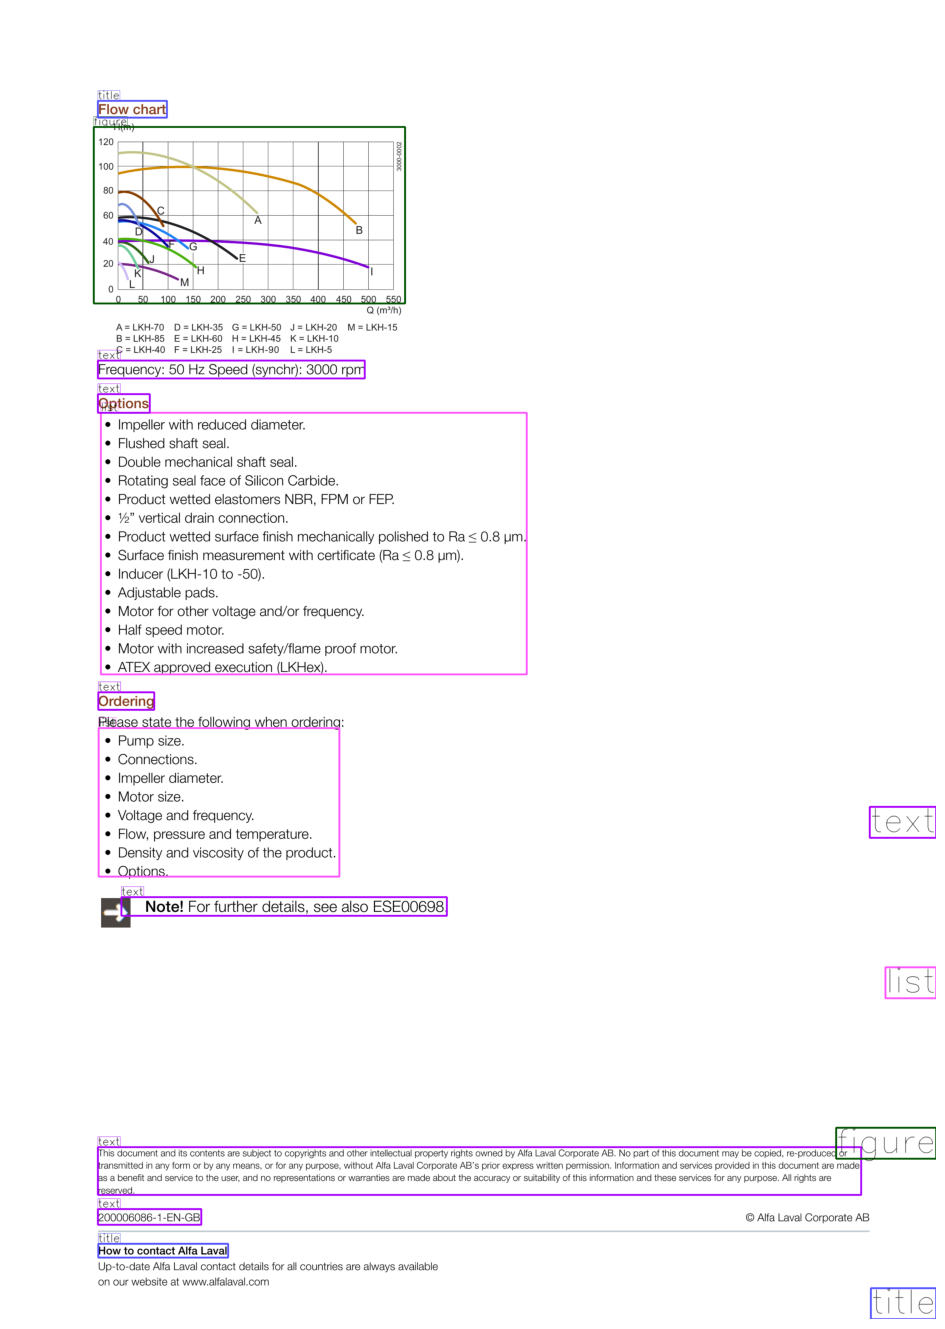

In [5]:
for dp in dps:
    image = dp.viz(show_words=False, show_tables=True)
    plt.figure(figsize = (25,17))
    plt.axis('off')
    plt.imshow(image)